# Introduction, Business Statement, and Business Understanding

## Introduction and Problem Statement

Traveling is one of the most cherished experiences globally, but finding the perfect destination that aligns with individual preferences, interests, or vacation goals remains a significant challenge for many. Travelers often spend hours researching potential destinations, sifting through reviews, or consulting friends and family to decide where to go. However, this process can be overwhelming due to the abundance of information available online, coupled with the difficulty of aligning their unique interests with the offerings of different destinations.

This project aims to solve this problem by leveraging machine learning to suggest and predict personalized travel destinations based on users' interests or the activities they wish to engage in during their vacations. By analyzing destination characteristics, the model can provide tailored suggestions, saving users time and effort while increasing their satisfaction with travel planning.

### Stakeholders:

- Travel Enthusiasts: Individuals seeking new destinations that align with their personal interests (e.g., art lovers wanting to visit galleries, nature enthusiasts looking for scenic hikes).
- Travel Agencies and Platforms: Businesses like Expedia, Booking.com, or TripAdvisor, which can integrate this  system to enhance their customer experience and increase user engagement.
- Destination Marketers: Local tourism boards or global travel organizations that can use the model to promote destinations based on specific target audience preferences.

These stakeholders would use the model to simplify decision-making, enhance customer experiences, and drive engagement or revenue growth by promoting destinations aligned with user interests.

## Business Understanding

Travel planning involves a complex interplay of preferences, budgets, and activities, often leaving individuals overwhelmed by choices or dissatisfied with their final decisions. For example, someone interested in art galleries might unknowingly miss an underrated artistic hub. Similarly, adventure seekers might struggle to identify destinations with off-the-beaten-path hiking opportunities due to limited information.

# Objectives

The primary objective of this project is:

- To create a machine learning model that can interpret user preferences and predict suitable country destinations using text classification techniques.

The secondary objectives are:
- To analyze the common descriptors used for top destinations on travel websites, using Lonely Planet's sample data as a benchmark.
- To compare attraction distribution across countries to identify imbalances, using Lonely Planet's sample data as a benchmark.
- To determine which countries are overrepresented on travel websites.
- To analyze international travel websites' marketing of Kenyan destinations and identify popular attractions and descriptive language used.

# Data Understanding

The dataset consists of attraction descriptions and names of places from around the world. For each attraction, we have the following features:

Attraction Name: The name of the attraction.

Attraction Description: A short description of the attraction.

Country: The country where the attraction is located (though this is not used directly in the classification task).

Region (Label): The geographical region (continent) to which the attraction belongs (e.g., Africa, Asia, Europe).

The goal is to predict the Region of each attraction based on its name and description.

## Data Limitations

While the dataset provides a solid foundation for a destination prediction system, several limitations could impact the model's performance and generalizability:

- Imbalanced Dataset: Some countries have significantly more attractions than others, potentially biasing the model toward over-represented countries. To address this, techniques like oversampling (e.g., SMOTE) or undersampling will be applied, and evaluation metrics like F1-score will ensure fair assessment across classes.

- Non-English Text: Some descriptions contain non-English words, which may introduce noise as the primary target language is English. This will be handled by translating non-English text where feasible or filtering it out during preprocessing.

- Text Cleaning: Raw text often includes irrelevant characters, stopwords, or inconsistencies. Cleaning will involve removing punctuation, stopwords, and applying lemmatization to standardize and refine the input data.

- Limited Geographic Scope: The dataset covers only 25 countries, limiting global applicability. Future iterations can incorporate additional data from other platforms or regions to expand coverage, with potential use of transfer learning to adapt the model to new data.

- By addressing these challenges through targeted preprocessing and robust modeling strategies, the project aims to ensure accurate and scalable predictions while laying the groundwork for future enhancements.

Importing relevant libraries

In [18]:
# Import Statements

import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import string
import regex as re


from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk import word_tokenize
from nltk import FreqDist

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn import set_config

from PIL import Image
#from wordcloud import WordCloud
#from textwrap import wrap

import joblib

Data Loading

In [19]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Capstone Project\Travel-WordFinder\Data\best_travel_destinations_for_2025.csv', encoding='latin1')
df.head()

,Attraction,Description,Country,Continent
0,Amboseli National Park,Amboseli belongs in the elite of Kenyaâs nat...,Kenya,Africa
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa
3,Nairobi National Park,Welcome to Kenyaâs most accessible yet incon...,Kenya,Africa
4,National Museum,"Kenyaâs wonderful National Museum, housed in...",Kenya,Africa


Handle missing data

In [20]:
# Check the first few rows to inspect the data
print(df.head())

# Check data types and for any missing values
print(df.info())

                       Attraction  \
0          Amboseli National Park   
1                      Fort Jesus   
2  David Sheldrick Wildlife Trust   
3           Nairobi National Park   
4                 National Museum   

                                         Description Country Continent  
0  Amboseli belongs in the elite of Kenyaâs nat...   Kenya    Africa  
1  This 16th-century fort and Unesco World Herita...   Kenya    Africa  
2  Occupying a plot within Nairobi National Park,...   Kenya    Africa  
3  Welcome to Kenyaâs most accessible yet incon...   Kenya    Africa  
4  Kenyaâs wonderful National Museum, housed in...   Kenya    Africa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18040 entries, 0 to 18039
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attraction   18040 non-null  object
 1   Description  18040 non-null  object
 2   Country      18040 non-null  object
 3   Continent    18040 no

In [21]:
# Checking the bottom of our dataset
df.tail()

,Attraction,Description,Country,Continent
18035,Byzantine Basilica,Near the Citadel's archaeological museum is th...,Jordan,Middle East
18036,Sharif Al Hussein Bin Ali Mosque,This grand and beautiful gleaming white mosque...,Jordan,Middle East
18037,North Theatre,The North Theatre is overgrown and missing muc...,Jordan,Middle East
18038,Shops,The shells of a row of shops remain in the wes...,Jordan,Middle East
18039,Rakhabat Canyon,"Close to Rum village, the labyrinthine siqs of...",Jordan,Middle East


Removing Duplicates

In [22]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Verify that duplicates are removed
print(df.duplicated().sum())

9
0


In [23]:
df.shape

(18031, 4)

Removing unneccesary white spaces

In [24]:
# Strip leading/trailing spaces from the text columns
df['Attraction'] = df['Attraction'].str.strip()
df['Description'] = df['Description'].str.strip()

# Verify that the text is cleaned
print(df[['Attraction', 'Description']].head())

                       Attraction  \
0          Amboseli National Park   
1                      Fort Jesus   
2  David Sheldrick Wildlife Trust   
3           Nairobi National Park   
4                 National Museum   

                                         Description  
0  Amboseli belongs in the elite of Kenyaâs nat...  
1  This 16th-century fort and Unesco World Herita...  
2  Occupying a plot within Nairobi National Park,...  
3  Welcome to Kenyaâs most accessible yet incon...  
4  Kenyaâs wonderful National Museum, housed in...  


Text Normalization

In [25]:
# Convert the 'Attraction' and 'Description' columns to lowercase
df['Attraction'] = df['Attraction'].str.lower()
df['Description'] = df['Description'].str.lower()

# Verify the changes
print(df[['Attraction', 'Description']].head())

                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description  
0  amboseli belongs in the elite of kenyaâs nat...  
1  this 16th-century fort and unesco world herita...  
2  occupying a plot within nairobi national park,...  
3  welcome to kenyaâs most accessible yet incon...  
4  kenyaâs wonderful national museum, housed in...  


Removing special characters

In [26]:

# Function to remove non-alphanumeric characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Apply this function to the 'Attraction' and 'Description' columns
df['Attraction'] = df['Attraction'].apply(remove_special_characters)
df['Description'] = df['Description'].apply(remove_special_characters)

# Verify the changes
print(df[['Attraction', 'Description']].head())

                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description  
0  amboseli belongs in the elite of kenyas nation...  
1  this thcentury fort and unesco world heritage ...  
2  occupying a plot within nairobi national park ...  
3  welcome to kenyas most accessible yet incongru...  
4  kenyas wonderful national museum housed in an ...  


Removing stop words


In [27]:
import nltk
from nltk.corpus import stopwords

# List of stopwords in English
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the function to both columns
df['Attraction'] = df['Attraction'].apply(remove_stopwords)
df['Description'] = df['Description'].apply(remove_stopwords)

# Verify the changes
print(df[['Attraction', 'Description']].head())


                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description  
0  amboseli belongs elite kenyas national parks e...  
1  thcentury fort unesco world heritage treasure ...  
2  occupying plot within nairobi national park no...  
3  welcome kenyas accessible yet incongruous safa...  
4  kenyas wonderful national museum housed imposi...  


Handling Outliers

In [28]:
# Remove rows with short descriptions 
df = df[df['Description'].apply(lambda x: len(x.split()) > 5)]

# Check the first few rows again
print(df.head())

                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description Country Continent  
0  amboseli belongs elite kenyas national parks e...   Kenya    Africa  
1  thcentury fort unesco world heritage treasure ...   Kenya    Africa  
2  occupying plot within nairobi national park no...   Kenya    Africa  
3  welcome kenyas accessible yet incongruous safa...   Kenya    Africa  
4  kenyas wonderful national museum housed imposi...   Kenya    Africa  


Review and Save Cleaned data

In [29]:
# Final review of the cleaned data
print(df.info())
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_attractions_data.csv', index=False)
print("Cleaned data saved to 'cleaned_attractions_data.csv'")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17959 entries, 0 to 18039
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attraction   17959 non-null  object
 1   Description  17959 non-null  object
 2   Country      17959 non-null  object
 3   Continent    17959 non-null  object
dtypes: object(4)
memory usage: 701.5+ KB
None
                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description Country Continent  
0  amboseli belongs elite kenyas national parks e...   Kenya    Africa  
1  thcentury fort unesco world heritage treasure ...   Kenya    Africa  
2  occupying plot within nairobi national park no...   Kenya    Africa  
3  welcome kenyas accessible yet incongruous safa...   Kenya    Africa  
4  kenyas w

Handling class imbalance

First, we should check if there is any class imbalance in the target column (Continent).
This will show  the distribution of each continent in our dataset. If there is a significant imbalance (e.g., some continents having many more attractions than others), we'll need to take steps to address it.

Asia             4447
Europe           3598
North America    3463
Africa           1673
Oceania          1672
South America    1635
Middle East      1471
Name: Continent, dtype: int64


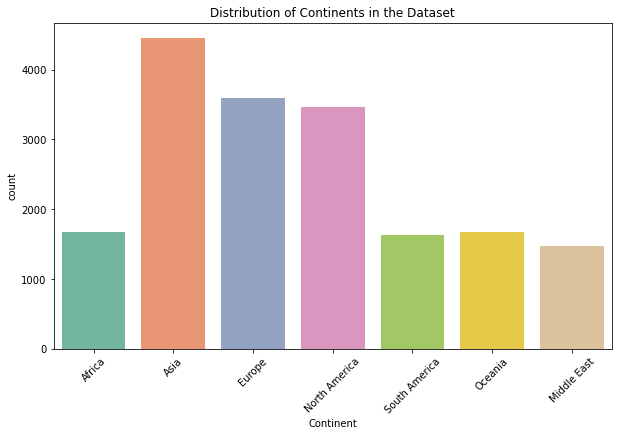

In [30]:
# Check the distribution of the 'Continent' column
continent_counts = df['Continent'].value_counts()
print(continent_counts)

# Plot the distribution of the 'Continent' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=df, palette='Set2')
plt.title('Distribution of Continents in the Dataset')
plt.xticks(rotation=45)
plt.show()

Yes, there is class imbalance, particularly between the Asia/Europe/North America group (which has much more data) and the Africa/Oceania/South America/Middle East group (which has fewer data points). we need to adress the imbalance

In [31]:
# Check the first few rows of the original DataFrame to verify column names
print(df.head())

# Check column names
print(df.columns)

                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description Country Continent  
0  amboseli belongs elite kenyas national parks e...   Kenya    Africa  
1  thcentury fort unesco world heritage treasure ...   Kenya    Africa  
2  occupying plot within nairobi national park no...   Kenya    Africa  
3  welcome kenyas accessible yet incongruous safa...   Kenya    Africa  
4  kenyas wonderful national museum housed imposi...   Kenya    Africa  
Index(['Attraction', 'Description', 'Country', 'Continent'], dtype='object')


### Feature Engineering: